<img src="lecture17_files/Galactic_Mind_75dpi_gamma_touched_cropped_title.jpg" width="480" height="480" align="center"/>
<h1><center>AST502 - Timothy Purdy - April 15, 2020 <font size="3"><sub>[1]</sub></font></center></h1>

## Topics:

This presentation will focus on sections within Chapter 9 - Classification, specifically "Deep Learning and Neural Networks", Section 9.8 from the book  "Statistics, Data Mining, and Machine Learning in Astronomy", Ivezic, et. al. [2]:
#### Supervised Learning: Classification via...

- 9.8&nbsp; Deep Learning and Neural Networks <br/>
&nbsp;&nbsp; 9.8.1&nbsp; Neural Networks <br/>
&nbsp;&nbsp; 9.8.2&nbsp; Training the Network <br/>
&nbsp;&nbsp; 9.8.3&nbsp; How Many Layers and How Many Neurons? <br/>
&nbsp;&nbsp; 9.8.4&nbsp; Convolutional Networks <br/>
&nbsp;&nbsp; 9.8.5&nbsp; Autoencoders <br/>

#### Project: Application to Real World Data...

- &nbsp; Solar Feature Detection of NSO-GONG H-Alpha Images via Neural Networks <br/>


## 9.8.1 - Neural Networks 

- Deep learning is basically an extension of neural networks, has become one of the principal techniques of machine learning.
- At the heart is a fundamental unit of computation called a neuron, found in the human brain.
- Biological Neural Networks (NN's) are the vast arrays of interlinked neurons found within the human brain.
- Artificial Neural Networks (ANN's) are an attempt to mimic the activity of NN's, via an abstract mathematical model built from simple functions with changing parameters, which can then be programmed as software for computers to emulate.

### What's the Difference between Biological  versus Artificial Neurons?
Simply put, a biological neuron has dendrites to receive signals, a cell body to process them (via a non-linear electrochemical reaction), and an axon to send signals out to other neurons.  The artificial neuron has a number of input channels, a processing stage, and one output that can fan out to multiple other artificial neurons. [3][4]
<img src="lecture17_files/Biological_vs_Artificial_Neuron01.jpg" width="320" height="320" align="center"/>

### Artifical Neural Network (ANN):
The below image shows a simplied ANN, which is composed of three layers: the Input Layer, the Hidden Layer (which can be one or more layers of neurons), and the Output Layer (used for generating classifications, such as Apple, Orange, or Potato).
<img src="lecture17_files/fig_9.17.jpg" width="480" height="480" align="center"/>
Figure 9.17: Illustration of the architecture of an artificial neural network (ANN) showing the connections between the input, output, and hidden layers.

- At the Input Layer, the ANN's take in a "weighted" sum ($\Sigma$) of inputs (which can be broadband photometric observations of a galaxy or pixel values from a CCD image), the artificial neurons of the Hidden Layer then applies an "activation function", f($\theta$), upon the weighted input sums along with a bias parameter, then another set of weighted sums are passed into the Output Layer's functions, which generates an output value (either singular or multiple) as part of the desired classification.
- The output from a neuron in the Hidden Layer is defined mathematically by:

$$a_{j} = f(\sum_{i}w_{ij}x_{i} + b_{j})$$
- If there are more than one layer of neurons in the Hidden Layer, this is called a "Fully Connected Layer".
- When outputs of neurons connect to subsequent layers (a one-to-one connection), the graph is acyclic and is referred to as a "Feed-Forward Network". This type of network is the most common used for classification.
- As used in autoencoders (section 9.8.5), it is not required that each layer have the same number of neurons as a previous layer, and that it is not required that all outputs connect to all neurons of the next layer. As stated in the book, "the art of defining a successful neural network often comes down to how we configure the number of and size of these layers." I.e. lots of room for "tweaking".
- The final output layer, like the hidden layer, also uses an activation function, g($\theta$), and acts upon the weighted sum of its inputs:

$$o_{k} = g(\sum_{j}w_{jk}a_{j} + b_{k}) = g(\sum_{j}w_{jk}f(\sum_{i}w_{ij}x_{i} + b_{j}) +b_{k}) $$

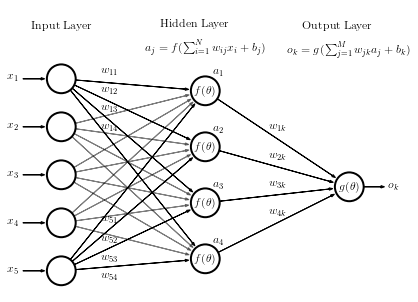

In [1]:
# Author: Jake VanderPlas & Brigitta Sipocz
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2019)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
# let's make sure that we can plot something 
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_axes([0, 0, 1, 1],
                  xticks=[], yticks=[])
plt.box(False)
circ = plt.Circle((1, 1), 2)

radius = 0.3


# function to draw arrows
def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2,
                          arrow_kwargs={'head_width': 0.05, 'fc': 'black'}):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


# function to draw circles
def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fc='none', lw=2)
    ax.add_patch(circ)


x1 = -3
x2 = 0
x3 = 3
y3 = -0.75

# ------------------------------------------------------------
# draw circles
for i, y1 in enumerate(np.linspace(1.5, -2.5, 5)):
    draw_circle(ax, (x1, y1), radius)
    ax.text(x1 - 0.9, y1, '$x_{}$'.format(i + 1),
            ha='right', va='center')
    draw_connecting_arrow(ax, (x1 - 0.9, y1), 0.1, (x1, y1), radius)

for i, y2 in enumerate(np.linspace(1.25, -2.25, 4)):
    draw_circle(ax, (x2, y2), radius)
    ax.text(x2, y2, r'$f(\theta)$', fontsize=12, ha='center', va='center')
    ax.text(x2 + radius * 0.9, y2 +radius, '$a_{}$'.format(i + 1), ha='center')
draw_circle(ax, (x3, y3), radius)
ax.text(x3 + 0.8, y3, '$o_k$', ha='left', va='center')
draw_connecting_arrow(ax, (x3, y3), radius, (x3 + 0.8, y3), 0.1)
ax.text(x3, y3, r'$g(\theta)$', fontsize=12, ha='center', va='center')

# ------------------------------------------------------------
# draw connecting arrows
for i, y1 in enumerate(np.linspace(1.5, -2.5, 5)):
    for j, y2 in enumerate(np.linspace(1.25, -2.25, 4)):
        # we only label a 2 sets of arrows to avoid overcrowding the figure
        if i not in [0, 4]:
            arrow_kwargs = {'head_width': 0.05, 'fc': 'black', 'alpha': 0.5}
        else:
            arrow_kwargs = {'head_width': 0.05, 'fc': 'black'}
        draw_connecting_arrow(ax, (x1, y1), radius, (x2, y2), radius,
                              arrow_kwargs=arrow_kwargs)
        if i % 5 == 0:
            va = 'bottom'
            shift = 0.1
        else:
            va = 'top'
            shift = -0.1
        if i in [0, 4]:
            ax.text((2*x1+x2)/3, (2*y1+y2)/3 + shift,
                    '$w_{%s%s}$' % ((i+1), (j+1)), va=va, fontsize=12,
                    ha='center')

for i, y2 in enumerate(np.linspace(1.25, -2.25, 4)):
    draw_connecting_arrow(ax, (x2, y2), radius, (x3, y3), radius)
    ax.text((x2+x3)/2, (y2+y3)/2 + 0.1, '$w_{%sk}$' % (i+1),
            fontsize=12, ha='center', va='bottom')

# ------------------------------------------------------------
# Add text labels
plt.text(x1, 2.7, "Input Layer", ha='center', va='top')
plt.text(x2, 2.7, r"Hidden Layer\\\\ $a_j=f(\sum_{i=1}^N w_{ij} x_i + b_j)$",
         ha='center', va='top')
plt.text(x3, 2.7, r"Output Layer\\\\ $o_k=g(\sum_{j=1}^M w_{jk} a_j + b_k)$",
         ha='center', va='top')

ax.set_aspect('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

### Types of Activation Functions
The success of an ANN, its learning behavior and charactistics, depends a lot on the choice of an adequate Activation Function, the mainstream types are [6]:

<img src="lecture17_files/ActivationFunctions.jpg" width="480" height="480" align="center"/>




#### Linear (or Identity) Activation Function

  - $f(x) = x$
  - Derivative of function is constant.
  - Complexity of inputs is not adequately expressed.
  - Range is from $-\infty$ to $+\infty$.

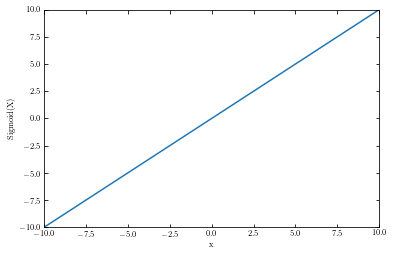

In [42]:
# Linear (or Identity) Example Code

# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 

# The range and resolution:
x = np.linspace(-10, 10, 100)

# Actual function:
z = x 
  
plt.plot(x, z) 
plt.xlabel("X") 
plt.ylabel("Linear(X)") 
  
plt.show()


#### Sigmoid (Logistic) Activation Function
  - $f(x) = 1/(1 + e^{-x})$
  - Function is differentiable. Function is monotonic but derivative is not.
  - Especially good for outputting probabilities in the range 0 to 1

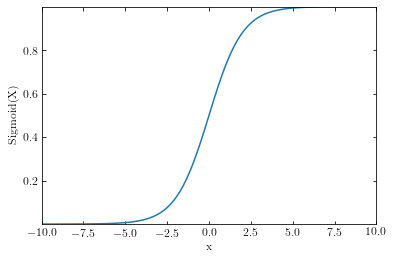

In [2]:
# Sigmoid (Logistic) Example Code

# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
# The range and resolution:
x = np.linspace(-10, 10, 100)

# Actual function:
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("X") 
plt.ylabel("Sigmoid(X)") 
  
plt.show()


#### Hyperbolic Tangent Activation Function
  - $f(x) = tanh(x)$
  - Function is differentiable. Function is monotonic but derivative is not.
  - Good for outputting values in the range -1 to 1, especially good at representing 0 values due to slope of curve.
  - Both tanh() and sigmoid are used in feed-forward networks.

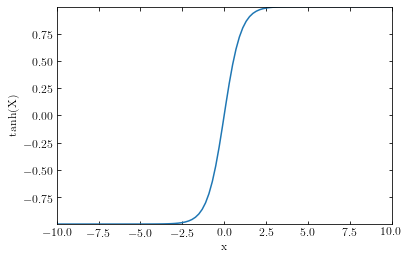

In [3]:
# Hyperbolic Tangent Example Code

# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
# The range and resolution:
x = np.linspace(-10, 10, 100)

# Actual function:
z = np.tanh(x)
  
plt.plot(x, z) 
plt.xlabel("X") 
plt.ylabel("tanh(X)") 
  
plt.show() 

#### ReLU (Rectified Linear Unit)  Activation Function
  - $f(x) = maximum(0, x)$
  - The function and its derivative are both monotonic.
  - Range of values from 0 to $\infty$. All negative inputs map to zero, which can be problematic in training.
  - Most commonly used activation function, used in almost all Convolutional Neural Networks (CNN) or deep learning.

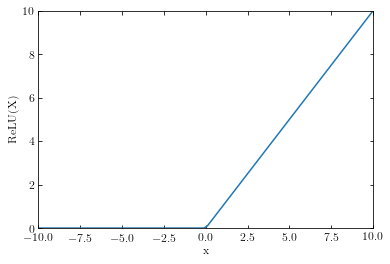

In [4]:
# Rectified Linear Unit (ReLU) Example Code

# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
# The range and resolution:
x = np.linspace(-10, 10, 100)

# Actual function: 
z = np.maximum(0,x)
  
plt.plot(x, z) 
plt.xlabel("X") 
plt.ylabel("ReLU(X)") 
  
plt.show() 

#### Leaky ReLU (Rectified Linear Unit) Activation Function
  - $f(x) = maximum(a*x, x)$, where 0 < a < 1, typically $a$ = 0.01 to 0.1
  - The function and its derivative are both monotonic.
  - Range of values can be mapped from $-\infty$ to $+\infty$.
  - Fixes the "dying ReLU problem" for negative values.

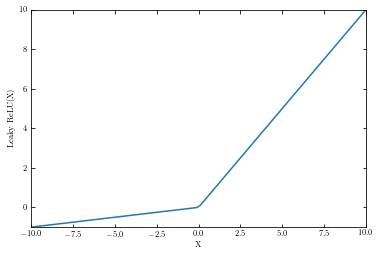

In [44]:
# Leaky Rectified Linear Unit (ReLU) Example Code

# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
# The range and resolution:
x = np.linspace(-10, 10, 100)

# Actual function:
a = 0.1
z = np.maximum(a*x,x)
  
plt.plot(x, z) 
plt.xlabel("X") 
plt.ylabel("Leaky ReLU(X)") 
  
plt.show() 

## 9.8.2 - Training the Network 
<img src="lecture17_files/Net_Training02.jpg" width="480" height="480" align="center"/>

- Training a network is conceptually simple, given a labeled set of data and a loss function, we need to optimize the weights and biases within the network by minimizing the loss.
- One approach is to use "gradient descent" with a forward propagation of errors.
- The weights and biases are perturbed and the neuron activations are propagated to the output layer, where the loss is calculated. Weakness: difficult when used in large networks.
- One solution is to use "backpropagation" to efficiently estimate the gradient of the loss function with respect to the weights and biases (a technique dating back to the 1970's).
  - Backpropagation, or the backward propagation of errors, is an example of automated differentiation, which is an algorithm used in training feedforward (non-cyclic) neural networks for supervised learning.

### How do we derive a calculation for the backpropagation?
Given our simplified single-layer network in Figure 9.17, we wish to calculate the gradient of the loss as a function of the weights (ignoring the bias for now).
<img src="lecture17_files/fig_9.17.jpg" width="40%" align="center"/>
Rewriting the input to a neuron as $z_{k} = \Sigma_{j}w_{jk}a_{j}$, we can use the chain rule to exprees the derivative of the loss, L, as a function of its input weights:

$$\frac{\partial L}{\partial w_{jk}} = \frac{\partial L}{\partial a_{k}}\frac{\partial a_{k}}{\partial z_{k}}\frac{\partial z_{k}}{\partial w_{jk}}$$

If we assume a sigmoid activation function and the $L_{2}$ norm for the loss function, we simplify the final layer as:

$$\frac{\partial L}{\partial w_{jk}} = (y - a_{k})a_{k}(1 - a_{k})a_{j} $$

Which can be written as $\delta_{k}a_{j}$ with $\delta_{k} = (y - a_{k})a_{k}(1 - a_{k})$

To determine $\partial L / \partial w_{ij}$, the derivative of the loss with repect to the inputs to the hidden layer, requires:

$$\frac{\partial L}{\partial w_{ij}} = \left[\Sigma_{k} \frac{\partial L}{\partial a_{k}}\frac{\partial a_{k}}{\partial z_{k}}\frac{\partial z_{k}}{\partial w_{jk}} \right]\frac{\partial a_{j}}{\partial z_{j}}\frac{\partial z_{j}}{\partial w_{ij}}$$

Which simplifies to:
$$\frac{\partial L}{\partial w_{ij}} = \left[\Sigma_{k}\delta_{k}w_{jk}\right]a_{j}(1 - a_{j})a_{i} $$
The gradient for each layer can now be estimated from the gradient and activation values of the subsequent layers!

### How are the weights tweaked?
- The optimization of a network starts with randomly initialized weights and biases (I would guess between 0 and 2 for each).
- One then forward propagates these weights through the network, calculate the loss, and then estimate the derivatives of the network via backpropagation.
- The weights are updated via:

$$ w'_{ij} = w_{ij} - \alpha \frac{\partial L}{\partial w_{ij}} $$

- Where $\alpha$ is called the "learning rate" and determines how much one perturbs the weights at each iteration.

### An example:
- The simple 5 input neural network of Figure 9.17, represents the u, g, r, i, z magnitudes for galaxies in the SDSS spectroscopic sample as the Input Layer. The Hidden Layer is comprised of 4 nodes which use a sigmoid activation function. The Output Layer comprises a single output node, and represents the redshift of a galaxy as its classification (Figure 9.18).

<img src="lecture17_files/fig_9.17.jpg" width="480" height="480" align="center"/>

### Redshift Results:
<img src="lecture17_files/fig_9.18_photoz_nn_1.jpg" width="50%" align="center"/>
Figure 9.18 Photometric redshift estimation using a simple, single-layer neural network. The 5-node Input Layer comprises the u, g, r, i, z magnitudes of 330,799 galaxies from the SDSS spectroscopic sample database. The Hidden Layer comprises 4-nodes with a single node Output Layer. The RMS for this simplified network is 0.025, comparable to that derived from random forest ($\S$9.7.3) and boosted decision trees ($\S$9.7.4). [2]

@pickle_results: computing results and saving to 'NNphotoz.pkl'
Epoch   0: train loss 9.517e-04 validation loss 7.747e-04
Epoch  10: train loss 6.495e-04 validation loss 6.694e-04
Epoch  20: train loss 6.353e-04 validation loss 6.516e-04
Epoch  30: train loss 6.174e-04 validation loss 6.297e-04
Epoch  40: train loss 6.045e-04 validation loss 6.196e-04
Epoch    46: reducing learning rate of group 0 to 1.0000e-04.
Epoch  50: train loss 5.981e-04 validation loss 6.166e-04
Epoch  60: train loss 5.968e-04 validation loss 6.156e-04
Epoch  70: train loss 5.955e-04 validation loss 6.140e-04
Epoch    72: reducing learning rate of group 0 to 1.0000e-05.
Epoch    79: reducing learning rate of group 0 to 1.0000e-06.
Epoch  80: train loss 5.948e-04 validation loss 6.134e-04
Finished training


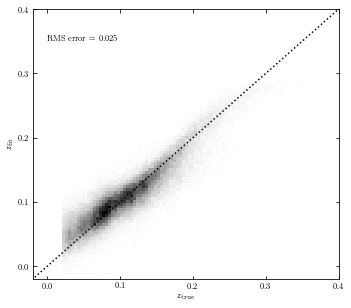

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as torchdata

from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results

# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
import matplotlib.pyplot as plt
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes into array
# normalize to zero mean and unit variance for easier training
datanormed = np.zeros((len(data), 6), dtype=np.float32)
for i, band in enumerate(['u', 'g', 'r', 'i', 'z']):
    band = 'modelMag_' + band
    datanormed[:, i] = (data[band] - data[band].mean()) / data[band].std()

# put redshifts into array
datanormed[:, 5] = data['z']


# define structure of neural net
class Net(nn.Module):
    def __init__(self, nhidden):
        super(Net, self).__init__()
        self.fc_h = nn.Linear(5, nhidden)
        self.fc_o = nn.Linear(nhidden, 1)

    def forward(self, x):
        h = F.relu(self.fc_h(x))
        z = self.fc_o(h)
        return z


# split data into 9:1 train:test
dataset = torchdata.TensorDataset(torch.tensor(datanormed[:, 0:5]),
                                  torch.tensor(datanormed[:, 5]).view(-1, 1))
trainnum = datanormed.shape[0] // 10 * 9
traindata, testdata = torchdata.random_split(dataset, [trainnum, datanormed.shape[0] - trainnum])
traindataloader = torchdata.DataLoader(traindata, batch_size=128, shuffle=True)


@pickle_results('NNphotoz.pkl')
def train_NN():
    model = Net(4)
    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=5, threshold=1e-3)

    min_valid_loss = float('inf')
    badepochs = 0
    for t in range(1000):
        train_loss = 0
        for i, databatch in enumerate(traindataloader, 0):
            photometry, redshifts = databatch
            optimizer.zero_grad()
            z_pred = model(photometry)
            loss = criterion(z_pred, redshifts)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        with torch.no_grad():
            photometry = testdata[:][0]
            redshifts = testdata[:][1]
            z_pred = model(photometry)
            valid_loss = criterion(z_pred, redshifts)
            if t % 10 == 0:
                print('Epoch %3i: train loss %0.3e validation loss %0.3e' % (t, \
                        train_loss / len(traindata), valid_loss / len(testdata)))
            # stop training if validation loss has not fallen in 10 epochs
            if valid_loss > min_valid_loss*(1-1e-3):
                badepochs += 1
            else:
                min_valid_loss = valid_loss
                badepochs = 0
            if badepochs == 10:
                print('Finished training')
                break
        scheduler.step(valid_loss)
    return model


model = train_NN()

# plot the results
with torch.no_grad():
    photometry = testdata[:][0]
    redshifts = testdata[:][1]
    z_pred = model(photometry)
    fig = plt.figure(figsize=(5, 5))
    fig.subplots_adjust(wspace=0.25,
                        left=0.1, right=0.95,
                        bottom=0.15, top=0.9)

    ax = plt.axes()
    #ax.scatter(redshifts, z_pred, s=1, lw=0, c='k')
    H, zs_bins, zp_bins = np.histogram2d(redshifts.numpy().flatten(), z_pred.numpy().flatten(), 151)
    ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
               extent=[zs_bins[0], zs_bins[-1], zp_bins[0], zp_bins[-1]],
               cmap=plt.cm.binary)
    ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
    rms = np.sqrt(np.mean((z_pred-redshifts).numpy()**2))
    ax.text(0, 0.35, 'RMS error = %0.3f' % np.sqrt(np.mean((z_pred-redshifts).numpy()**2)))
    ax.set_xlim(-0.02, 0.4001)
    ax.set_ylim(-0.02, 0.4001)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.set_xlabel(r'$z_{\rm true}$')
    ax.set_ylabel(r'$z_{\rm fit}$')
    plt.show()

## 9.8.3 How Many Layers and How Many Neurons? 

<img src="lecture17_Files/tfdl_0402.jpg" width="480" height="480" align="center"/>
An example of a Fully Connected Neural Network with multiple layers and multiple neurons in each layer. [5]

### How many?
- Network architectures comprise a certain number of neurons in a layer, a certain number of layers, and the connectivity (topology) between those layers of neurons.
- So a central question in deep learning applications is: how to configure this network? How many neurons should we include in each layer and how many layers do we need?
- Too few and one risks underfitting where the network cannot adapt to structure.
- Too many and one risks of mapping to noise.
- Cross-validation ($\S$8.1.1 [2]) is often used to evaluate the performance of a NN.


### How many layers?
- Depends on the nature of the input data.
- If data is linear, then Zero layers are needed.
- A single layer can approximate a continuous function.
- Two layers can represent arbitrary decision boundaries for smooth functions (ie. edge detection).
- Three or more layers can represent noncontinuous or complex structure within data.
- Despite computational advances using GPU's or specialized TPU's (Tensor Processing Units), the ability to train multilayer networks has improved, but it's a more trial and error approach (via weight and bias perturbations) than applying underlying principles.
- As a starting point, there are few problems that benefit significantly with the use of more than 2 layers.
- Start with a single hidden layer and during training, use cross-validation to determine when an additional layer is added, the data becomes "overfit" and starts mapping the noise.

### How many neurons?
- Like the number of layers, the number of neurons within a layer can increase computational cost.
- More neurons tend to require larger and larger training sets to avoid overfitting of data.
- Some "rule of thumb" suggestions from proposals include:
  - The number of neurons should lie between the number of input and output nodes (i.e. 5 hidden layer nodes = 5 input nodes).
<h6><center>OR</center></h6>
  - The number of neurons should be equal to the number of outputs plus 2/3 the number of input nodes.
<h6><center>OR</center></h6>
  - The number of neurons in the hidden layer should be less than twice the size of the input layers.
- Again, the above are just "rules of thumb" to get one started.

##  9.8.4 Convolutional Neural Networks 
- Convolutional Neural Networks [8] (or CNN's) are networks designed to work with images or with any regularly sampled dataset.
- CNN's have been heavily involved with improvements in performance of image and video classification techniques.
- Traditional deep learning networks, with a series of fully connected layers, image classification would require a many-to-many connection of each image pixel to every neuron in the first layer of hidden layer: impractical with today's large format CCD's.
- CNN's reduce this complexity of the network by requiring that neurons respond only to a subset of an image, the receptive field, for its learning.
- This mimics the operation of the human brain's visual cortex whereby neurons only respond to a small part of the field of view.
- There are four principal component steps to a CNN (figure 9.19):
  - Convolutional Layer
  - Nonlinear Activation Function
  - Pooling or Downsampling Operation
  - Fully Connected Layer for Classification

### Processing Layers of a Convolutional Neural Network:
<img src="lecture17_files/fig_9.19_cnn_1.jpg" style="width=20%"/>
Figure 9.19 Network architecture for convolutional neural network showing the principal component steps.

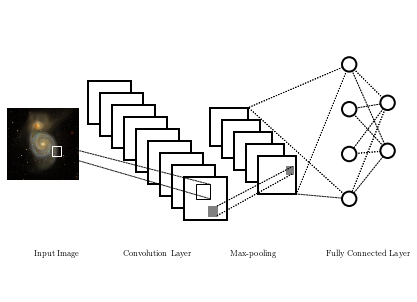

In [9]:
# Author: Brigitta Sipocz
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2019)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import os

import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

fig = plt.figure(figsize=(6, 4), facecolor='w')

# ------------------------------------------------------------
# Get the galaxy image
#
# TODO: use astroquery once it supports SDSS ImageCutout
# http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=202.469575&dec=47.1952583&scale=2&width=500&height=500&
#
__file__ = './Lecture17_files/'
m51 = plt.imread(os.path.join(os.path.dirname(__file__), 'm51.jpeg'))
ax1 = fig.add_axes((0, 0.4, 0.25, 0.25))
ax1.set_axis_off()
ax1.imshow(m51)

# ------------------------------------------------------------
# CNN cartoon

ax = fig.add_axes([0, 0, 1, 1],
                  xticks=[], yticks=[])
plt.box(False)
circ = plt.Circle((1, 1), 2)

radius = 0.15


# function to draw arrows
def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2, fc='grey', **kwargs):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], fc=fc, linestyle=':', **kwargs)


# function to draw circles
def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fc='none', lw=2)
    ax.add_patch(circ)


# function to squares circles
def draw_squares(ax, center, size, num, shift=(0.25, -0.25),
                 line=None, **kwargs):
    ec = kwargs.pop('ec', 'black')
    lw = kwargs.pop('lw', 2)
    fc = kwargs.pop('fc', 'white')

    shift = np.array(shift)
    back_left_bottom = np.array(center) - num // 2 * shift - size / 2

    back_right_top = np.array(center) - num // 2 * shift + size / 2
    front_right_bottom = np.array(center) + num // 2 * shift + np.array([size, - size]) / 2

    for i in range(num):
        rec = plt.Rectangle(back_left_bottom + i * shift, size, size,
                            fc=fc, ec=ec, lw=lw, **kwargs)
        ax.add_patch(rec)

    if line:
        node1, node2, radius = line
        draw_connecting_arrow(ax, back_right_top, 0, node1, radius)
        draw_connecting_arrow(ax, front_right_bottom, 0, node2, radius)

        # To draw more lines to the fully connected layer
        if num > 1:
            draw_connecting_arrow(ax, back_right_top, 0, node2, radius)
            draw_connecting_arrow(ax, front_right_bottom, 0, node1, radius)

    return (back_right_top, front_right_bottom)


x1 = -3.1
x2 = -1
x3 = 1
x4 = 3
x5 = 3.8
seq1 = np.linspace(1.8, -1, 4)
seq2 = np.linspace(1, 0, 2)

# ------------------------------------------------------------
# convolution layer

_, first_layer = draw_squares(ax, (x2, 0), 0.9, 9)
_, second_layer = draw_squares(ax, (x3, 0), 0.8, 5,
                               line=((x4, seq1[0]), (x4, seq1[-1]), radius))

# ------------------------------------------------------------
# convolution layer connections

elem1 = draw_squares(ax, (x1, 0), 0.2, 1, ec='white', fc='none', lw=1)

draw_squares(ax, first_layer + [-0.5, 0.6], 0.3, 1, line=(*elem1, 0.2),
             ec='black', fc='none', lw=1)

elem2 = draw_squares(ax, first_layer + [-0.3, 0.2], 0.2, 1,
                     ec='grey', fc='grey', lw=1)

draw_squares(ax, second_layer + [-0.15, 0.5], 0.15, 1, line=(*elem2, 0),
             ec='grey', fc='grey', lw=1)

# ------------------------------------------------------------
# fully connected layer
#
# draw circles
for i, y4 in enumerate(seq1):
    draw_circle(ax, (x4, y4), radius)

for i, y5 in enumerate(seq2):
    draw_circle(ax, (x5, y5), radius)

# draw connecting arrows
for i, y4 in enumerate(seq1):
    for j, y5 in enumerate(seq2):
        draw_connecting_arrow(ax, (x4, y4), radius, (x5, y5), radius)

# ------------------------------------------------------------
# Add text labels

plt.text(x1, -2.2, 'Input Image', ha='center')
plt.text(x2, -2.2, 'Convolution Layer', ha='center')
plt.text(x3, -2.2, 'Max-pooling', ha='center')
plt.text((x4 + x5)/2, -2.2, 'Fully Connected Layer', ha='center')

ax.set_aspect('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

### Convolutional Layer Step
- Convolution in a CNN refers to the convolution of the input data $I(x,y)$ with a kernel $K(x,y)$ which will produce a feature map $F(x,y)$:

$$F(x,y) = K(x,y) * I(x,y) = \Sigma_{x_{0}}\Sigma_{y_{0}}I(x - x_{0}, y - y_{0})K(x_{0},y_{0})$$

- The size of the kernel defines the receptive field pixels it operates upon.
- The kernels in the convolution are described by a "depth" (i.e. the number of kernels applied to the image), and a "stride" (how many pixels a kernel shifts in each step, typically one).
- Given an $N x M$ image, the result of the convolution step is to transform a single image into a data cube of feature maps with a dimension of $N x M x K$.

### Nonlinear Activation Function Step
- The nonlinear activation function is applied to the Input Image's individual pixels, resulting in the feature maps.
- The activation function is typically a ReLU function, but can be a sigmoid or hyperbolic tangent function.
- The ReLU is popular in that it's derivative is easy to calculate: 1 if the neuron is activated, 0 otherwise.

### Pooling (Max-Pooling) Step
- The pooling step downsamples (or subsamples) the feature map data cubes.
- Pooling summarizes feature map values within a region of interest (i.e. a 2x2 pixel window).
- The summary can be the average pixel value, but more commonly the maximum pixel value is preserved (max-pooling) in the downsampling (an average value tends to "soften" the image for learning).
- The benefit is that this pooling of feature maps reduces the size of the resulting network, thus making the network less sensitive to differences between images.
- Training of the network, including the learning of the underlying kernels, is performed via backpropagation.

### Fully Connected Output Layer
- This final layer is the classification layer which maps the output of the CNN to a set of labels.
- This layer is typically fully connected ($\S$9.8.2) where each output of the final pooling layer connects to all neurons in the classification layer.
- Figure 9.20 shows the results of a simple CNN, which has 5 convolution and activation layers, 3 max-pooling layers, and 2 fully connected layers for classification. 
- This CNN is trained to predict if a galaxy (from the SDSS) is spiral or elliptical.
- The Receiver Operating Characteristic (ROC) curve ($\S$9.9) maps the true positive rate as a function of the false positive rate.
- After training, this CNN has a 0.875 probability of correctly classifying a galaxy image.

<img src="lecture17_files/fig_9.20_morph_nn_1.jpg" style="width=70%"/>
Figure 9.20: Multilayer Convolutional Neural Network.

In [7]:
# Generate a CNN for classifying SDSS galaxy images using the catalogs of
# Nair and Abraham (2010) http://adsabs.harvard.edu/abs/2010ApJS..186..427N
# Ellipticals are class 0. Spirals are class 1
# Derived from https://github.com/mhuertascompany/IAC_XXX_WINTER (Marc Huertas Company)
#
#import matplotlib.pyplot as plt
#from pathlib import Path
#
#from sklearn.metrics import roc_curve
#
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation, Flatten
#
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#
#import random
#
#from sklearn.utils import shuffle
#from sklearn.metrics import accuracy_score
#
#from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint
#
#import numpy as np

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from math import log10
from math import pi
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from astropy.table import Table
from astropy.cosmology import Planck13
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from scipy import misc
from scipy.ndimage import zoom
from scipy.ndimage.interpolation import rotate
import glob
from astropy.io import fits
from astropy.table import Table
from math import log10
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.pyplot import imread
from scipy.ndimage import zoom
from scipy.ndimage.interpolation import rotate
import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import rmsprop

import random
import pdb
import time

from sklearn.utils import shuffle

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.models import model_from_json
from keras.models import model_from_yaml
from keras.optimizers import SGD

import imageio

%matplotlib inline

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.ymargin'] = 0.05


def read_savefile(filename):
    '''Read npy save file containing images or labels of galaxies'''
    return np.load(filename)


def CNN(img_channels, img_rows, img_cols, verbose=False):
    '''Define CNN model for Nair and Abraham data'''

    # some hyperparamters you can chage
    dropoutpar = 0.5
    nb_dense = 64

    model = Sequential()
    model.add(Convolution2D(32, 6, 6, border_mode='same',
                            input_shape=(img_rows, img_cols, img_channels)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Convolution2D(64, 5, 5, border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(64, 5, 5, border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, 2, 2, border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, 3, 3, border_mode='same'))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(nb_dense, activation='relu'))
    model.add(Dropout(dropoutpar))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    print("Compilation...")

    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    print("... done!")
    if verbose is True:
        print("Model Summary")
        print("===================")
        model.summary()
    return model


def train_CNN(X, Y, ntrain, nval, output="test", verbose=False):
    '''Train the CNN given a dataset and output model and weights'''

    # train params - hardcoded for simplicity
    batch_size = 30
    nb_epoch = 50
    data_augmentation = True  # if True the data will be augmented at every iteration

    #sampled_list=int(range(0, ntrain+nval-1))
    print('ntrain=')
    ind = random.sample(range(0, int(ntrain+nval-1), int(ntrain+nval-1))
    X_train = X[ind[0:ntrain],:,:,:]
    X_val = X[ind[ntrain:ntrain+nval],:,:,:]
    Y_train = Y[ind[0:ntrain]]
    Y_val = Y[ind[ntrain:ntrain+nval]]

    # input image dimensions
    img_rows, img_cols = X_train.shape[1:3]
    img_channels = 3

    # Right shape for X
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,
                              img_channels)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, img_channels)

    # Avoid more iterations once convergence
    patience_par = 10
    earlystopping = EarlyStopping(monitor='val_loss', patience=patience_par,
                                  verbose=0, mode='auto' )
    modelcheckpoint = ModelCheckpoint(output+"_best.hd5", monitor='val_loss',
                                      verbose=0, save_best_only=True)

    # Define CNN
    model = CNN(img_channels, img_rows, img_cols, verbose=True)

    if not data_augmentation:
        print('Not using data augmentation.')
        history = model.fit(X_train, Y_train,
                            batch_size=batch_size,
                            nb_epoch=nb_epoch,
                            validation_data=(X_val, Y_val),
                            shuffle=True, verbose=verbose,
                            callbacks=[earlystopping, modelcheckpoint])
    else:
        print('Using real-time data augmentation.')
        # this will do preprocessing and realtime data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=45,
            width_shift_range=0.05,
            height_shift_range=0.05,
            horizontal_flip=True,
            vertical_flip=True,
            zoom_range=[0.75, 1.3])

        datagen.fit(X_train)

        history = model.fit_generator(
            datagen.flow(X_train, Y_train, batch_size=batch_size),
            samples_per_epoch=X_train.shape[0],
            nb_epoch=nb_epoch,
            validation_data=(X_val, Y_val),
            callbacks=[earlystopping, modelcheckpoint])

    print("Saving model...")
    # save weights
    model.save_weights(output+".weights", overwrite=True)

    return "test"

def apply_CNN(X, model_name):
    '''Apply a CNN to a data set'''
    # input image dimensions
    img_rows, img_cols = X.shape[1:3]
    img_channels = 3
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)

    # load model & predict
    print("Loading weights", model_name)

    model = CNN(img_channels, img_rows, img_cols)
    model.load_weights(model_name+".weights")
    Y_pred = model.predict_proba(X)

    return Y_pred


def add_titlebox(ax, text):
    '''Add an embedded title into figure panel'''
    ax.text(.1, .85, text,
            horizontalalignment='left',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    return ax


def plot_CNN_performance(pred, labels):
    '''Plot ROC curve and sample galaxies'''

    fig = plt.figure(figsize=(6, 3))
    fig.subplots_adjust(wspace=0.1, hspace=0.1,
                        left=0.1, right=0.95,
                        bottom=0.15, top=0.9)

    # define shape of figure
    gridsize = (2, 4)
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid(gridsize, (0, 2))
    ax3 = plt.subplot2grid(gridsize, (0, 3))
    ax4 = plt.subplot2grid(gridsize, (1, 2))
    ax5 = plt.subplot2grid(gridsize, (1, 3))

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(labels, pred)

    ax1.plot(fpr, tpr, color='black')
    ax1.set_xlabel(r'False Positive Rate')
    ax1.set_ylabel(r'True Positive Rate')

    # array of objects (good E, good S, bad E, bad S)
    goodE = np.where((pred[:, 0] < 0.5) & (labels == 0))
    goodS = np.where((pred[:, 0] > 0.5) & (labels == 1))
    badE = np.where((pred[:, 0] < 0.5) & (labels == 1))
    badS = np.where((pred[:, 0] > 0.5) & (labels == 0))

    ax2.imshow(D[pred_index + goodE[0][1]])
    add_titlebox(ax2, "Correct E")
    ax2.axis('off')

    ax3.imshow(D[pred_index + goodS[0][4]])
    add_titlebox(ax3, "Correct Spiral")
    ax3.axis('off')

    ax4.imshow(D[pred_index + badE[0][1]])
    add_titlebox(ax4, "Incorrect E")
    ax4.axis('off')

    ax5.imshow(D[pred_index + badS[0][3]])
    add_titlebox(ax5, "Incorrect Spiral")
    ax5.axis('off')

    plt.show()


n_objects = 50
#n_objects = 500
save_files = "./SDSS{}".format(n_objects)

# Read SDSS images and labels
#D = read_savefile("sdss_images_1000.npy")[0:n_objects]
#Y = read_savefile("sdss_labels_1000.npy")[0:n_objects]
D = read_savefile("sdss_images_50.npy")[0:n_objects]
Y = read_savefile("sdss_labels_50.npy")[0:n_objects]

# Train network and output to disk (keep 10% of data for test set)
ntrain = D.shape[0] * 8 // 10.
nval = D.shape[0] // 10
npred = D.shape[0] - (ntrain + nval)  # test sample size;
pred_index = ntrain + nval            # test sample start index;

# Normalize images
mu = np.amax(D, axis=(1, 2))
for i in range(0, mu.shape[0]):
    D[i, :, :, 0] = D[i, :, :, 0] / mu[i, 0]
    D[i, :, :, 1] = D[i, :, :, 1] / mu[i, 1]
    D[i, :, :, 2] = D[i, :, :, 2] / mu[i, 2]

# change order so that we do not use always the same objects to train/test
D, Y, = shuffle(D, Y, random_state=0)

my_file = Path(save_files + ".weights")
if my_file.is_file():
    Y_pred = apply_CNN(D[pred_index:pred_index + npred, :, :, :], save_files)
    Y_test=Y[pred_index:pred_index + npred]
else:
    print("Training Model")
    print("====================")
    model_name = train_CNN(D, Y, ntrain, nval, output=save_files)
    Y_pred = apply_CNN(D[pred_index:pred_index + npred, :, :, :], save_files)
    Y_test = Y[pred_index:pred_index + npred]

Y_pred_class = Y_pred * 0
Y_pred_class[Y_pred > 0.5] = 1
print("Global Accuracy:", accuracy_score(Y_test, Y_pred_class))


plot_CNN_performance(Y_pred, Y_test)

SyntaxError: invalid syntax (<ipython-input-7-f723b37278f4>, line 160)

##  9.8.5 Autoencoders
<img src="lecture17_files/fig_9.21_vae_1.jpg" width="480" height="480" align="center"/>
Figure 9.21 depicts the structure of a variational autoencoder.

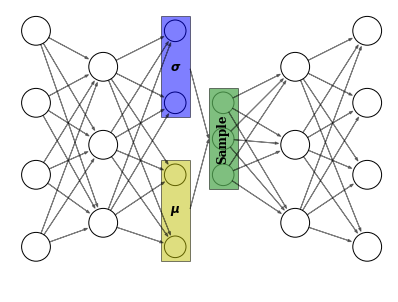

In [8]:
# Author: Brigitta Sipocz
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2019)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
import matplotlib
# ----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
# uselatex need to be `False` to be able to use bold fonts for text
setup_text_plots(fontsize=12, usetex=False)

matplotlib.rc('font', weight='bold')

fig = plt.figure(figsize=(6, 4), facecolor='w')
ax = fig.add_axes([0, 0, 1, 1],
                  xticks=[], yticks=[])
plt.box(False)
circ = plt.Circle((1, 1), 2)

radius = 0.3


# ----------------------------------------------------------------------
# function to draw arrows
def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2,
                          arrow_kwargs={'head_width': 0.05, 'fc': 'black',
                                        'alpha': 0.5}):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


# function to draw circles
def draw_circle(ax, center, radius, **kwargs):
    circ = plt.Circle(center, radius, fc='none', lw=1, **kwargs)
    ax.add_patch(circ)


x1 = -3.4
x2 = -2
x3 = -0.5
x4 = 0.5
x5 = 2
x6 = 3.5

seq1 = np.linspace(2.5, -2, 4)
seq2 = np.linspace(1.75, -1.5, 3)
seq3 = np.hstack([np.linspace(2.5, 1, 2), np.linspace(-0.5, -2, 2)])
seq4 = np.linspace(1, -0.5, 3)
seq5 = np.linspace(1.75, -1.5, 3)
seq6 = np.linspace(2.5, -2, 4)


# ------------------------------------------------------------
# draw circles
for i, y1 in enumerate(seq1):
    draw_circle(ax, (x1, y1), radius)

for i, y2 in enumerate(seq2):
    draw_circle(ax, (x2, y2), radius)

for i, y3 in enumerate(seq3):
    draw_circle(ax, (x3, y3), radius * 0.75)

ax.add_patch(plt.Rectangle((x3 - radius, seq3[1] - radius), radius * 2,
                           seq3[0] - seq3[1] + 2 * radius, fc='b', alpha=0.5))
ax.text(x3, (seq3[0] + seq3[1]) / 2, r'$\sigma$', fontsize=12,
        ha='center', va='center')

ax.add_patch(plt.Rectangle((x3 - radius, seq3[3] - radius), radius * 2,
                           seq3[2] - seq3[3] + 2 * radius, fc='y', alpha=0.5))
ax.text(x3, (seq3[2] + seq3[3]) / 2, r'$\mu$', fontsize=12,
        ha='center', va='center')

draw_connecting_arrow(ax, (x3 + radius, (seq3[0] + seq3[1]) / 2), radius * 0.15,
                      (x4 - radius, seq4[1]), radius * 0.2)
draw_connecting_arrow(ax, (x3 + radius, (seq3[2] + seq3[3]) / 2), radius * 0.15,
                      (x4 - radius, seq4[1]), radius * 0.2)

for i, y4 in enumerate(seq4):
    draw_circle(ax, (x4, y4), radius * 0.75, alpha=0.5)

ax.text(x4, seq4[1], 'Sample', fontsize=12, ha='center',
        va='center', rotation=90)

ax.add_patch(plt.Rectangle((x4 - radius, seq4[2] - radius), radius * 2,
                           seq4[0] - seq4[2] + 2 * radius, fc='g', alpha=0.5))

for i, y5 in enumerate(seq5):
    draw_circle(ax, (x5, y5), radius)

for i, y6 in enumerate(seq6):
    draw_circle(ax, (x6, y6), radius)

# ------------------------------------------------------------
# draw connecting arrows
for i, y1 in enumerate(seq1):
    for j, y2 in enumerate(seq2):
        draw_connecting_arrow(ax, (x1, y1), radius, (x2, y2), radius)

for i, y2 in enumerate(seq2):
    for j, y3 in enumerate(seq3):
        draw_connecting_arrow(ax, (x2, y2), radius, (x3, y3), radius * 0.8)


for i, y4 in enumerate(seq4):
    for j, y5 in enumerate(seq5):
        draw_connecting_arrow(ax, (x4, y4), radius * 0.75, (x5, y5), radius)

for i, y5 in enumerate(seq5):
    for j, y6 in enumerate(seq6):
        draw_connecting_arrow(ax, (x5, y5), radius, (x6, y6), radius)


# ------------------------------------------------------------
# Add axis

#ax.arrow(-3.8, -2.6, 0, 5, head_width=0.05)
#ax.arrow(-3.8, -2.6, 7.5, 0, head_width=0.05)
#plt.text(0, -2.8, "Latent Space 1", ha='center', va='center')
#plt.text(-3.9, 0, "Latent Space 2", ha='center', va='center', rotation=90)


ax.set_aspect('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

### Autoencoders
- Autoencoders and the related Variational Autoencoders are variants of Neural Networks that learn the encoding or structure within the data.
- They typically are two networks: an encoder which learns the data representation, and a decoder which that reconstructs the the input data from this representation.
- Interestingly, if the network layer that encodes the data, has a subsequent layer with fewer neurons, the data is compressed.
- The amount of compression is defined by the number of neurons in the smallest (or bottleneck) layer.
- One weakness is the interpolation of data between "latent space" within the dataset.

### Variational Autoencoders
- Variational Autoencoders overcome the interpolation issue of autoencoders, and can interpolate in a generative, or continuous fashion (Figure 9.22).
- In a variational autoencoder, a function $p(z)$ is assumed to have the form of a Gaussian distribution with zero mean and unit variance. The "loss" for this network is given by:

$$L = \Sigma_{i}E_{q(z|x_{i}}[log p(x_{i}|z)] - KL(q(z|x_{i})||p(z)) $$
- Where KL() is th Kullback-Leibler divergence between $q(z|x)$ and $p(z)$.
- The encoder maps an input x to a latent space z with a distribution function $q(z|x)$.
- The decoder maps a point in the latent space z to a point in data space.

### Smoothly Fitted Spectra via Variational Autoencoder:
<img src="lecture17_files/fig_9.22_sdss_vae_1.jpg" style="width:60%">
Figure 9.22 Spectra generated from a variational autoencoder applied to data from the SDSS survey. As neurons are activated across the latent space, a smooth transition of spectra is generated, consistent with quiescent to star-forming galaxies.

downloading PCA-processed SDSS spectra from https://github.com/astroML/astroML-data/raw/master/datasets/spec4000.npz to C:\Users\Tim\astroML_data
[=========================================]  27.15Mb / 27.15Mb   
Epoch   0: train loss 2282.1 validation loss 1261.8
Epoch  10: train loss  409.4 validation loss  391.8
Epoch  20: train loss  239.2 validation loss  318.5
Epoch  30: train loss  174.9 validation loss  281.1
Epoch  40: train loss  144.5 validation loss  263.0
Epoch  50: train loss  128.5 validation loss  250.0
Epoch  60: train loss  125.0 validation loss  246.1
Epoch  70: train loss  102.8 validation loss  235.3
Epoch    77: reducing learning rate of group 0 to 1.0000e-05.
Epoch  80: train loss  108.0 validation loss  224.8
Epoch    87: reducing learning rate of group 0 to 1.0000e-06.
Epoch  90: train loss   97.5 validation loss  225.6
Finished training


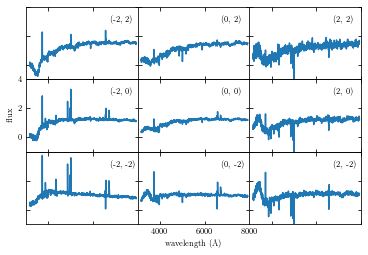

In [10]:
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as torchdata

from astroML.datasets import sdss_corrected_spectra

# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Fetch and prepare the data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

# normalize spectra by integrated flux and subtract out mean, for easier training
spectranorms = np.mean(spectra, axis=1)
normedspectra = spectra / spectranorms[:, None]
meanspectrum = np.mean(normedspectra, axis=0)
normedspectra -= meanspectrum[None, :]

# split data into 3:1 train:test
torch.manual_seed(802)  # seed used for book figure
dataset = torchdata.TensorDataset(torch.tensor(normedspectra))
trainnum = normedspectra.shape[0] // 4 * 3
traindata, testdata = torchdata.random_split(dataset, [trainnum, normedspectra.shape[0] - trainnum])
traindataloader = torchdata.DataLoader(traindata, batch_size=128, shuffle=True)


# define structure of variation autoencoder
class VAE(nn.Module):
    def __init__(self, nhidden=250):
        super(VAE, self).__init__()

        self.encode_fc = nn.Linear(1000, nhidden)
        self.mu        = nn.Linear(nhidden, 2)
        self.logvar    = nn.Linear(nhidden, 2)

        self.decode_fc = nn.Linear(2, nhidden)
        self.output    = nn.Linear(nhidden, 1000)

    def encode(self, x):
        h = F.relu(self.encode_fc(x))
        return self.mu(h), self.logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)

    def decode(self, z):
        h = F.relu(self.decode_fc(z))
        return self.output(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


# add KL divergence to loss function
def VAEloss(criterion, recon_x, x, mu, logvar):
    return criterion(recon_x, x) - 0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())


def train_model():
    model = VAE()
    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=5, threshold=1e-3)

    min_valid_loss = float('inf')
    badepochs = 0
    for t in range(1000):
        train_loss = 0
        for i, databatch in enumerate(traindataloader, 0):
            specbatch = databatch[0]
            optimizer.zero_grad()
            recon, mu, logvar = model(specbatch)
            loss = VAEloss(criterion, recon, specbatch, mu, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        with torch.no_grad():
            testspec = testdata[:][0]
            recon, mu, logvar = model(testspec)
            valid_loss = VAEloss(criterion, recon, testspec, mu, logvar)
            if t % 10 == 0:
                print('Epoch %3i: train loss %6.1f validation loss %6.1f' % \
                        (t, train_loss / len(traindata), valid_loss / len(testdata)))
            # stop training if validation loss has not fallen in 10 epochs
            if valid_loss > min_valid_loss*(1-1e-3):
                badepochs += 1
            else:
                min_valid_loss = valid_loss
                badepochs = 0
            if badepochs == 10:
                print('Finished training')
                break
        scheduler.step(valid_loss)
    return model

model = train_model()

# plot results
with torch.no_grad():
    # sort latent parameters from most constrained to least constrained
    testspec = dataset[:][0]
    recon, mu, logvar = model(testspec)
    zorder = np.argsort(np.mean(logvar.numpy(), axis=0))

    fig = plt.figure()
    fig.subplots_adjust(hspace=0, wspace=0)
    parvalues = [-2.,0.,2.]
    for i, z1 in enumerate(parvalues):
        for j, z2 in enumerate(parvalues):
            # get z1 to vary left to right, z2 bottom to top
            ax = fig.add_subplot(3, 3, (2-j)*len(parvalues)+i+1)

            z = np.zeros((1,2), dtype=np.float32)
            z[0, zorder] = z1, z2 # set z1 is more constrained of the two latent parameters
            spectrum = model.decode(torch.tensor(z))
            ax.plot(wavelengths, meanspectrum+spectrum.numpy()[0,:])
            ax.text(6750, 3, '(%i, %i)' % (z1,z2))

            ax.set_xlim(3000, 8000)
            ax.set_ylim(-1, 4)

            if i == 0 and j == 1:
                ax.set_ylabel('flux')
            else:
                ax.yaxis.set_major_formatter(plt.NullFormatter())
            if j == 0 and i == 1:
                ax.set_xlabel(r'${\rm wavelength\ (\AA)}$')
            else:
                ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

## Caveats
- A lot of time can be spent finding the right number of neurons, layers of neurons, as well as tweaking the input and output weights and biases to get the expected classification results. But once trained, neural nets can be a robust classification tool.
- Output results are only as good as the input training set.
  - Colleagues son worked with some computer scientists to train a neural network for Solar features. Discovered an anomolous  29-day period in the data. Was actually the Sun's axial rotation period they discovered. ;-)
- A lesson learned on my part, is that one should frequently re-run their Python code, to make sure it works, as updates to various packages are released over time.
  - Problems getting the Python code for the Morphological Convolutional Neural Network example was problematic.

## Project:
### - Solar Feature Detection of NSO-GONG H-Alpha Images via Convolutional Neural Networks 
### - Personal Background:
 - I work as a Senior Scientific Programmer for the National Solar Observatory's (NSO), NSO Integrated Synoptic Program (NISP) Global Oscillation Network Group (GONG) program (a bit of a mouthful ;-)
 - My role is software/optical development and support of GONG's 6-site network of telescopes.

### GONG's Six-Site Network of Telescopes:
<img src="lecture17_files/gong-sites.jpg" style="width:100%">

### Big Bear Solar Observatory Site:
<img src="lecture17_files/bb.jpg" style="width:60%"/>

## GONG produces various data products...

### Velocity Images - Measures the doppler shifting of Solar surface relative to 676nm Nickel Line
<img src="lecture17_files/velocity.jpg"  width="480" height="480" align="center"/>

### Helioseismic Parameters - Generate regular spherical harmonic coefficients for various $\mathscr{l}$ and $\mathscr{m}$ values of Sun
<img src="lecture17_files/helioseismology-1.jpg"  width="480" height="480" align="center"/>

### Magnetogram Images - Maps magnetic field strength across Solar disk
<img src="lecture17_files/ctzqa140227t1124_dim-860.jpg"  width="480" height="480" align="center"/>

### Magnetic Potential-Field Source-Surface (PFSS) Maps - 3d modeling of magnetic field extension
<img src="lecture17_files/filled-b-field.jpg"  width="480" height="480" align="center"/>

### Farside Maps - Holographic projection maps of far-side features of Sun via near-side helioseismic changes
<img src="lecture17_files/fs2s_061106t0000.jpg"  width="640" height="480"  align="center"/>

### H-alpha Images - Solar chromospheric images taken at wavelength 6562.8$\mathring A$
<img src="lecture17_files/20140227112434Ch.jpg"  width="480" height="480" align="center"/>

#### Types of features: Filaments, Plages, Prominences, Sunspots, and Flares

### My project interest is to use the Convolutional Neural Network (CNN) technique for mapping H-Alpha Solar features, namely Filaments:
<img src="lecture17_files/SolarImageCNN.jpg" style="width:70%">


### Game Plan:
- I have FTP'ed a set of 2Kx2K CCD H-Alpha J-PEG images from our Cerro Tololo site, a total of 638 images from 27-FEB-2014 spanning 11:23 thru 22:28 UT (this was during the last Solar Maximum). These will be the Input Layer of images.
- For the Convolution Layer, define a kernel "depth" and "stride" for the Feature Map set, which stays within 95% of solar radius (due to limb darkening). The training will be done on 80% of the images, approximately 500.
- From the Feature Maps, perform a Max-pooling of each Feature Map set.
- Each Max-pooling set will then be the Input Layer for a Neural Net (NN), or Fully Connected Layer.
- Tweak the weights and biases of NN, with backpropagation errors calculated in order to stabilize the training.
- The Fully Connected Layer's Output Layer will initially be for Filament classification, but there should be room for additional feature classifications: i.e. Sunspots, Plages, etc.

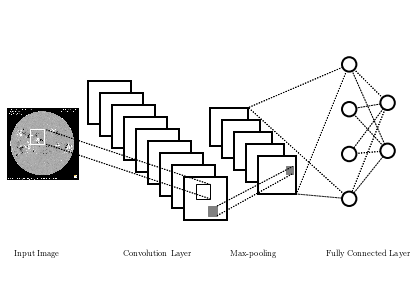

In [40]:
# Author: Brigitta Sipocz
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2019)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import os

import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

fig = plt.figure(figsize=(6, 4), facecolor='w')

# ------------------------------------------------------------
# Get the Solar magnetogram image
#
# TODO: use astroquery once it supports NSO image downloads
# ftp://gong2.nso.edu/oQR/zqa/201402/ctzqa140227/ctzqa140227t1124_dim-860.jpg
#
__file__ = './Lecture17_files/'
sun = plt.imread(os.path.join(os.path.dirname(__file__), 'ctzqa140227t1124_dim-860.jpg'))
ax1 = fig.add_axes((0, 0.4, 0.25, 0.25))
ax1.set_axis_off()
ax1.imshow(sun)

# ------------------------------------------------------------
# CNN cartoon

ax = fig.add_axes([0, 0, 1, 1],
                  xticks=[], yticks=[])
plt.box(False)
circ = plt.Circle((1, 1), 2)

radius = 0.15


# function to draw arrows
def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2, fc='grey', **kwargs):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], fc=fc, linestyle=':', **kwargs)


# function to draw circles
def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fc='none', lw=2)
    ax.add_patch(circ)


# function to squares circles
def draw_squares(ax, center, size, num, shift=(0.25, -0.25),
                 line=None, **kwargs):
    ec = kwargs.pop('ec', 'black')
    lw = kwargs.pop('lw', 2)
    fc = kwargs.pop('fc', 'white')

    shift = np.array(shift)
    back_left_bottom = np.array(center) - num // 2 * shift - size / 2

    back_right_top = np.array(center) - num // 2 * shift + size / 2
    front_right_bottom = np.array(center) + num // 2 * shift + np.array([size, - size]) / 2

    for i in range(num):
        rec = plt.Rectangle(back_left_bottom + i * shift, size, size,
                            fc=fc, ec=ec, lw=lw, **kwargs)
        ax.add_patch(rec)

    if line:
        node1, node2, radius = line
        draw_connecting_arrow(ax, back_right_top, 0, node1, radius)
        draw_connecting_arrow(ax, front_right_bottom, 0, node2, radius)

        # To draw more lines to the fully connected layer
        if num > 1:
            draw_connecting_arrow(ax, back_right_top, 0, node2, radius)
            draw_connecting_arrow(ax, front_right_bottom, 0, node1, radius)

    return (back_right_top, front_right_bottom)


x1 = -3.5
x2 = -1
x3 = 1
x4 = 3
x5 = 3.8
seq1 = np.linspace(1.8, -1, 4)
seq2 = np.linspace(1, 0, 2)

# ------------------------------------------------------------
# convolution layer

_, first_layer = draw_squares(ax, (x2, 0), 0.9, 9)
_, second_layer = draw_squares(ax, (x3, 0), 0.8, 5,
                               line=((x4, seq1[0]), (x4, seq1[-1]), radius))

# ------------------------------------------------------------
# convolution layer connections

elem1 = draw_squares(ax, (x1, 0.3), 0.3, 1, ec='white', fc='none', lw=1)

draw_squares(ax, first_layer + [-0.5, 0.6], 0.3, 1, line=(*elem1, 0.05),
             ec='black', fc='none', lw=1)

elem2 = draw_squares(ax, first_layer + [-0.3, 0.2], 0.2, 1,
                     ec='grey', fc='grey', lw=1)

draw_squares(ax, second_layer + [-0.15, 0.5], 0.15, 1, line=(*elem2, 0),
             ec='grey', fc='grey', lw=1)

# ------------------------------------------------------------
# fully connected layer
#
# draw circles
for i, y4 in enumerate(seq1):
    draw_circle(ax, (x4, y4), radius)

for i, y5 in enumerate(seq2):
    draw_circle(ax, (x5, y5), radius)

# draw connecting arrows
for i, y4 in enumerate(seq1):
    for j, y5 in enumerate(seq2):
        draw_connecting_arrow(ax, (x4, y4), radius, (x5, y5), radius)

# ------------------------------------------------------------
# Add text labels

plt.text(x1, -2.2, 'Input Image', ha='center')
plt.text(x2, -2.2, 'Convolution Layer', ha='center')
plt.text(x3, -2.2, 'Max-pooling', ha='center')
plt.text((x4 + x5)/2, -2.2, 'Fully Connected Layer', ha='center')

ax.set_aspect('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

In [10]:
# Generate a CNN for classifying NSO/GONG H-alpha Solar features.
# Final Project for University of Arizona's AST502 Course Spring 2020.
#
# Output Classifiers:
# Filaments = 1, Plages = 2, Prominences = 3, Sunspots = 4, Flares = 5
#
# Adapted from Nair and Abraham (2010) http://adsabs.harvard.edu/abs/2010ApJS..186..427N
#
# Derived from https://github.com/mhuertascompany/IAC_XXX_WINTER (Marc Huertas Company)
#
#import matplotlib.pyplot as plt
#from pathlib import Path
#
#from sklearn.metrics import roc_curve
#
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation, Flatten
#
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#
#import random
#
#from sklearn.utils import shuffle
#from sklearn.metrics import accuracy_score
#
#from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint
#
#import numpy as np

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from math import log10
from math import pi
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from astropy.table import Table
from astropy.cosmology import Planck13
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from scipy import misc
from scipy.ndimage import zoom
from scipy.ndimage.interpolation import rotate
import glob
from astropy.io import fits
from astropy.table import Table
from math import log10
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.pyplot import imread
from scipy.ndimage import zoom
from scipy.ndimage.interpolation import rotate
import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import rmsprop

import random
import pdb
import time

from sklearn.utils import shuffle

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.models import model_from_json
from keras.models import model_from_yaml
from keras.optimizers import SGD

import imageio

%matplotlib inline

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.ymargin'] = 0.05


def read_savefile(filename):
    '''Read npy save file containing images or labels of galaxies'''
    return np.load(filename)


def CNN(img_channels, img_rows, img_cols, verbose=False):
    '''Define CNN model for Nair and Abraham data'''

    # some hyperparamters you can chage
    dropoutpar = 0.5
    nb_dense = 64

    model = Sequential()
    model.add(Convolution2D(32, 6, 6, border_mode='same',
                            input_shape=(img_rows, img_cols, img_channels)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Convolution2D(64, 5, 5, border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(64, 5, 5, border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, 2, 2, border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, 3, 3, border_mode='same'))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(nb_dense, activation='relu'))
    model.add(Dropout(dropoutpar))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    print("Compilation...")

    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    print("... done!")
    if verbose is True:
        print("Model Summary")
        print("===================")
        model.summary()
    return model


def train_CNN(X, Y, ntrain, nval, output="test", verbose=False):
    '''Train the CNN given a dataset and output model and weights'''

    # train params - hardcoded for simplicity
    batch_size = 30
    nb_epoch = 50
    data_augmentation = True  # if True the data will be augmented at every iteration

    #sampled_list=int(range(0, ntrain+nval-1))
    print('ntrain=')
    ind = random.sample(range(0, int(ntrain+nval-1), int(ntrain+nval-1))
    X_train = X[ind[0:ntrain],:,:,:]
    X_val = X[ind[ntrain:ntrain+nval],:,:,:]
    Y_train = Y[ind[0:ntrain]]
    Y_val = Y[ind[ntrain:ntrain+nval]]

    # input image dimensions
    img_rows, img_cols = X_train.shape[1:3]
    img_channels = 3

    # Right shape for X
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,
                              img_channels)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, img_channels)

    # Avoid more iterations once convergence
    patience_par = 10
    earlystopping = EarlyStopping(monitor='val_loss', patience=patience_par,
                                  verbose=0, mode='auto' )
    modelcheckpoint = ModelCheckpoint(output+"_best.hd5", monitor='val_loss',
                                      verbose=0, save_best_only=True)

    # Define CNN
    model = CNN(img_channels, img_rows, img_cols, verbose=True)

    if not data_augmentation:
        print('Not using data augmentation.')
        history = model.fit(X_train, Y_train,
                            batch_size=batch_size,
                            nb_epoch=nb_epoch,
                            validation_data=(X_val, Y_val),
                            shuffle=True, verbose=verbose,
                            callbacks=[earlystopping, modelcheckpoint])
    else:
        print('Using real-time data augmentation.')
        # this will do preprocessing and realtime data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=45,
            width_shift_range=0.05,
            height_shift_range=0.05,
            horizontal_flip=True,
            vertical_flip=True,
            zoom_range=[0.75, 1.3])

        datagen.fit(X_train)

        history = model.fit_generator(
            datagen.flow(X_train, Y_train, batch_size=batch_size),
            samples_per_epoch=X_train.shape[0],
            nb_epoch=nb_epoch,
            validation_data=(X_val, Y_val),
            callbacks=[earlystopping, modelcheckpoint])

    print("Saving model...")
    # save weights
    model.save_weights(output+".weights", overwrite=True)

    return "test"

def apply_CNN(X, model_name):
    '''Apply a CNN to a data set'''
    # input image dimensions
    img_rows, img_cols = X.shape[1:3]
    img_channels = 3
    X = X.reshape(X.shape[0], img_rows, img_cols, img_channels)

    # load model & predict
    print("Loading weights", model_name)

    model = CNN(img_channels, img_rows, img_cols)
    model.load_weights(model_name+".weights")
    Y_pred = model.predict_proba(X)

    return Y_pred


def add_titlebox(ax, text):
    '''Add an embedded title into figure panel'''
    ax.text(.1, .85, text,
            horizontalalignment='left',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    return ax


def plot_CNN_performance(pred, labels):
    '''Plot ROC curve and sample galaxies'''

    fig = plt.figure(figsize=(6, 3))
    fig.subplots_adjust(wspace=0.1, hspace=0.1,
                        left=0.1, right=0.95,
                        bottom=0.15, top=0.9)

    # define shape of figure
    gridsize = (2, 4)
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid(gridsize, (0, 2))
    ax3 = plt.subplot2grid(gridsize, (0, 3))
    ax4 = plt.subplot2grid(gridsize, (1, 2))
    ax5 = plt.subplot2grid(gridsize, (1, 3))

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(labels, pred)

    ax1.plot(fpr, tpr, color='black')
    ax1.set_xlabel(r'False Positive Rate')
    ax1.set_ylabel(r'True Positive Rate')

    # array of objects (good E, good S, bad E, bad S)
    goodE = np.where((pred[:, 0] < 0.5) & (labels == 0))
    goodS = np.where((pred[:, 0] > 0.5) & (labels == 1))
    badE = np.where((pred[:, 0] < 0.5) & (labels == 1))
    badS = np.where((pred[:, 0] > 0.5) & (labels == 0))

    ax2.imshow(D[pred_index + goodE[0][1]])
    add_titlebox(ax2, "Correct E")
    ax2.axis('off')

    ax3.imshow(D[pred_index + goodS[0][4]])
    add_titlebox(ax3, "Correct Spiral")
    ax3.axis('off')

    ax4.imshow(D[pred_index + badE[0][1]])
    add_titlebox(ax4, "Incorrect E")
    ax4.axis('off')

    ax5.imshow(D[pred_index + badS[0][3]])
    add_titlebox(ax5, "Incorrect Spiral")
    ax5.axis('off')

    plt.show()


n_objects = 50
#n_objects = 500
save_files = "./SDSS{}".format(n_objects)

# Read SDSS images and labels
#D = read_savefile("sdss_images_1000.npy")[0:n_objects]
#Y = read_savefile("sdss_labels_1000.npy")[0:n_objects]
D = read_savefile("sdss_images_50.npy")[0:n_objects]
Y = read_savefile("sdss_labels_50.npy")[0:n_objects]

# Train network and output to disk (keep 10% of data for test set)
ntrain = D.shape[0] * 8 // 10.
nval = D.shape[0] // 10
npred = D.shape[0] - (ntrain + nval)  # test sample size;
pred_index = ntrain + nval            # test sample start index;

# Normalize images
mu = np.amax(D, axis=(1, 2))
for i in range(0, mu.shape[0]):
    D[i, :, :, 0] = D[i, :, :, 0] / mu[i, 0]
    D[i, :, :, 1] = D[i, :, :, 1] / mu[i, 1]
    D[i, :, :, 2] = D[i, :, :, 2] / mu[i, 2]

# change order so that we do not use always the same objects to train/test
D, Y, = shuffle(D, Y, random_state=0)

my_file = Path(save_files + ".weights")
if my_file.is_file():
    Y_pred = apply_CNN(D[pred_index:pred_index + npred, :, :, :], save_files)
    Y_test=Y[pred_index:pred_index + npred]
else:
    print("Training Model")
    print("====================")
    model_name = train_CNN(D, Y, ntrain, nval, output=save_files)
    Y_pred = apply_CNN(D[pred_index:pred_index + npred, :, :, :], save_files)
    Y_test = Y[pred_index:pred_index + npred]

Y_pred_class = Y_pred * 0
Y_pred_class[Y_pred > 0.5] = 1
print("Global Accuracy:", accuracy_score(Y_test, Y_pred_class))


plot_CNN_performance(Y_pred, Y_test)

SyntaxError: invalid syntax (<ipython-input-10-9f928538708a>, line 165)

Bibliography:
- [1] Title Cover from "Science Digest - Special Edition", Winter 1979, pg 35; Sculpture by Nick Aristovulos / Photgraph by Shig Ikeda
- [2] "Statistics, Data Mining, and Machine Learning", 2nd edition, Ivezic, Zeljko, Connolly, Andrew J., VanderPlas, Jacob T., & Gray, Alexander; ISBN 978-0-691-19830-9
- [3] Source: https://www.quora.com/What-is-the-differences-between-artificial-neural-network-computer-science-and-biological-neural-network
- [4] Source: https://towardsdatascience.com/the-differences-between-artificial-and-biological-neural-networks-a8b46db828b7
- [5] Source: https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html
- [6] Source: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- [7] "A Catalog of Detailed Visual Morphological Classifications for 14,034 Galaxies in the Sloan Digital Sky Survey", Ap. J. Supp. Series, 186:427–456, 2010 February, Nair and Abraham, doi: 10.1088/0067-0049/186/2/427
- [8] LeCun, Y., B. E. Boser, J. S. Denker,D.Henderson, R. E.Howard, W. E. Hubbard, and
L. D. Jackel (1989). Backpropagation applied to handwritten zip code recognition.
Neural Computation 1(4), 541–551.